## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from IPython.display import Audio
import resampy

## Extract Data

In [10]:
if not os.path.exists("kaggle"):
    os.mkdir("kaggle")
if not os.path.exists("kaggle/input"):
    os.mkdir("kaggle/input")
if not os.path.exists("kaggle/input/ravdess-emotional-speech-audio/"):
    os.mkdir("kaggle/input/ravdess-emotional-speech-audio/")

In [13]:
path = "kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

In [14]:
#happens sometimes 
#if '.DS_Store' in os.listdir("data"):
#    os.remove('data/.DS_Store')

    
#extract file values 
directory_list = os.listdir(path)

file_emotion = []
file_path = []
file_gender = []
file_intensity = []
file_line = []


for dir in directory_list:
    
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(path + dir)
    
    for file in actor:
        part = file.split('.')
        part = part[0].split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_intensity.append(0 if int(part[3]) == 1 else 1) #0 is normal and 1 is strong
        file_line.append("Kids are talking by the door" if int(part[4]) == 1 else "Dogs are sitting by the door")
        file_path.append(path + dir + '/' + file)
        file_gender.append(0 if int(dir.split('_')[1]) %2 == 1 else 1) #0 is male and 1 is female
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# dataframe for gender of actor
gender_df = pd.DataFrame(file_gender, columns=['Gender'])

#dataframe for emotional intensity
intensity_df = pd.DataFrame(file_intensity, columns=['Intensity'])

#dataframe for sentences spoken
line_df = pd.DataFrame(file_line, columns=['Line'])


#main df
df = pd.concat([path_df, emotion_df, gender_df, intensity_df, line_df], axis=1)

# changing integers to actual emotions.
df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
df.to_csv("data_clean.csv")

df.head()

Path Emotions  Gender  \
0  kaggle/input/ravdess-emotional-speech-audio/au...    angry       1   
1  kaggle/input/ravdess-emotional-speech-audio/au...     fear       1   
2  kaggle/input/ravdess-emotional-speech-audio/au...     fear       1   
3  kaggle/input/ravdess-emotional-speech-audio/au...    angry       1   
4  kaggle/input/ravdess-emotional-speech-audio/au...  disgust       1   

   Intensity                          Line  
0          0  Dogs are sitting by the door  
1          0  Dogs are sitting by the door  
2          1  Kids are talking by the door  
3          1  Kids are talking by the door  
4          0  Kids are talking by the door

### Read file
Use `head` and `tail` to retrieve the top and bottom `n` rows. Use `sample` to randomly view `5` rows

In [15]:
df = pd.read_csv("data_clean.csv")
df.head()

Unnamed: 0                                               Path Emotions  \
0           0  kaggle/input/ravdess-emotional-speech-audio/au...    angry   
1           1  kaggle/input/ravdess-emotional-speech-audio/au...     fear   
2           2  kaggle/input/ravdess-emotional-speech-audio/au...     fear   
3           3  kaggle/input/ravdess-emotional-speech-audio/au...    angry   
4           4  kaggle/input/ravdess-emotional-speech-audio/au...  disgust   

   Gender  Intensity                          Line  
0       1          0  Dogs are sitting by the door  
1       1          0  Dogs are sitting by the door  
2       1          1  Kids are talking by the door  
3       1          1  Kids are talking by the door  
4       1          0  Kids are talking by the door

In [16]:
df.tail()

Unnamed: 0                                               Path Emotions  \
1435        1435  kaggle/input/ravdess-emotional-speech-audio/au...    happy   
1436        1436  kaggle/input/ravdess-emotional-speech-audio/au...    happy   
1437        1437  kaggle/input/ravdess-emotional-speech-audio/au...     calm   
1438        1438  kaggle/input/ravdess-emotional-speech-audio/au...     calm   
1439        1439  kaggle/input/ravdess-emotional-speech-audio/au...  neutral   

      Gender  Intensity                          Line  
1435       1          1  Dogs are sitting by the door  
1436       1          0  Kids are talking by the door  
1437       1          1  Kids are talking by the door  
1438       1          0  Dogs are sitting by the door  
1439       1          0  Dogs are sitting by the door

In [17]:
df.sample(5)

Unnamed: 0                                               Path  Emotions  \
674         674  kaggle/input/ravdess-emotional-speech-audio/au...  surprise   
940         940  kaggle/input/ravdess-emotional-speech-audio/au...   neutral   
994         994  kaggle/input/ravdess-emotional-speech-audio/au...     happy   
242         242  kaggle/input/ravdess-emotional-speech-audio/au...      fear   
517         517  kaggle/input/ravdess-emotional-speech-audio/au...     angry   

     Gender  Intensity                          Line  
674       0          1  Dogs are sitting by the door  
940       1          0  Kids are talking by the door  
994       1          1  Kids are talking by the door  
242       0          0  Kids are talking by the door  
517       1          0  Dogs are sitting by the door

In [18]:
df.isna().sum()

Unnamed: 0    0
Path          0
Emotions      0
Gender        0
Intensity     0
Line          0
dtype: int64

### Summary Statistics

In [19]:
df[["Gender","Intensity","Emotions"]].describe(include="all")

Gender    Intensity Emotions
count   1440.000000  1440.000000     1440
unique          NaN          NaN        8
top             NaN          NaN    angry
freq            NaN          NaN      192
mean       0.500000     0.466667      NaN
std        0.500174     0.499061      NaN
min        0.000000     0.000000      NaN
25%        0.000000     0.000000      NaN
50%        0.500000     0.000000      NaN
75%        1.000000     1.000000      NaN
max        1.000000     1.000000      NaN

### Data distribution

In [20]:
df["Emotions"].value_counts().plot(kind='bar',color={'red','blue','green','orange','yellow','purple','indigo','turquoise'})

<Axes: >

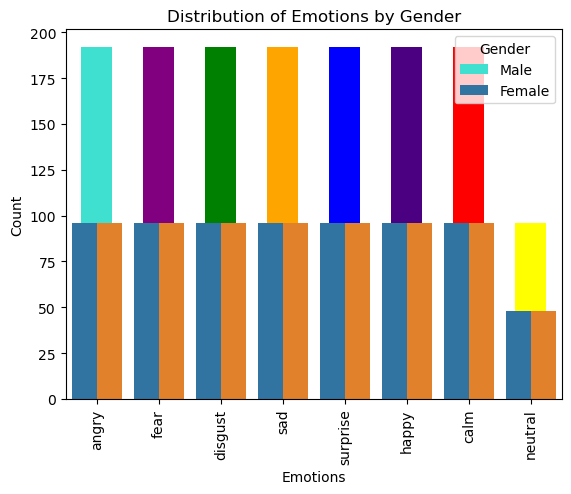

Emotions  Gender  Intensity
angry     0       0            48
                  1            48
surprise  1       0            48
          0       1            48
                  0            48
sad       1       1            48
                  0            48
          0       1            48
                  0            48
neutral   1       0            48
          0       0            48
happy     1       1            48
                  0            48
          0       1            48
                  0            48
fear      1       1            48
                  0            48
          0       1            48
                  0            48
disgust   1       1            48
                  0            48
          0       1            48
                  0            48
calm      1       1            48
                  0            48
          0       1            48
                  0            48
angry     1       1            48
                  0 

In [21]:
sns.countplot(x='Emotions', hue='Gender', data=df) #ax
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Emotions by Gender')
plt.legend(title='Gender', loc='upper right', labels=['Male','Female'])  
plt.show()

# Display count values on top of the bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


df[['Emotions', 'Gender', 'Intensity']].value_counts()
# df['Line'].value_counts()

Data is evenly distributed except "Neutral" emotion has half the number of samples as there is no "Strong" emotional intensity for "Neutral" 

### View Waveforms

In [22]:
#helper functions
def create_waveform(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Amplitude waveform for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
        

def create_spectrogram(data, sr, e): #use mel-spectro instead?
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram (Pitch) for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') #log is better for differentiating - mel-spectrogram
    plt.colorbar()
        

#df is global variable
def show(emotion):
    path = np.array(df.Path[df.Emotions==emotion])[1]
    data, sampling_rate = librosa.load(path)
    create_waveform(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)
    display(Audio(path))

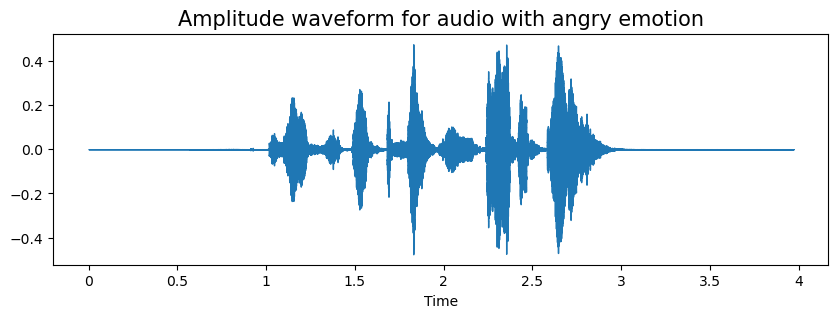

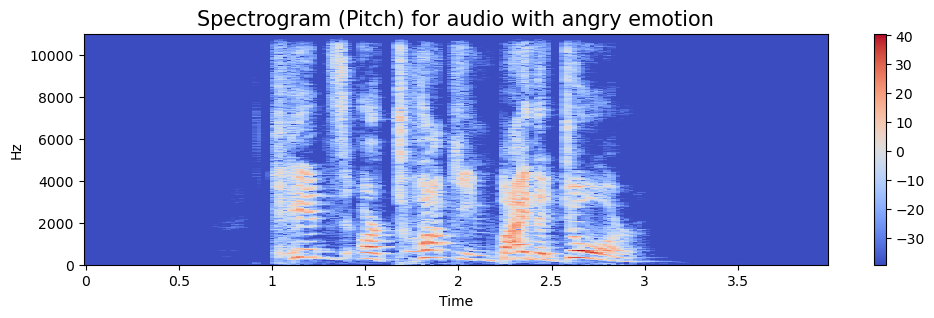

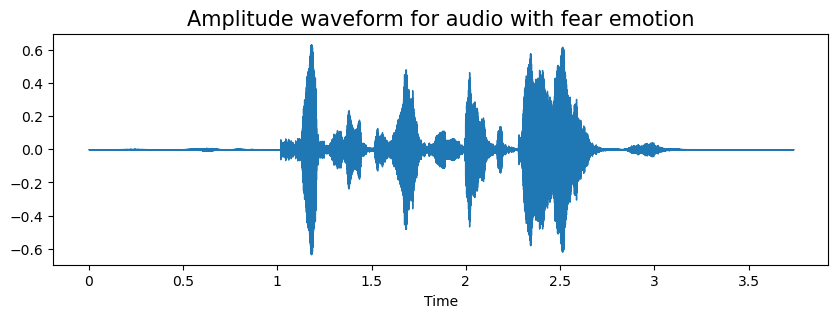

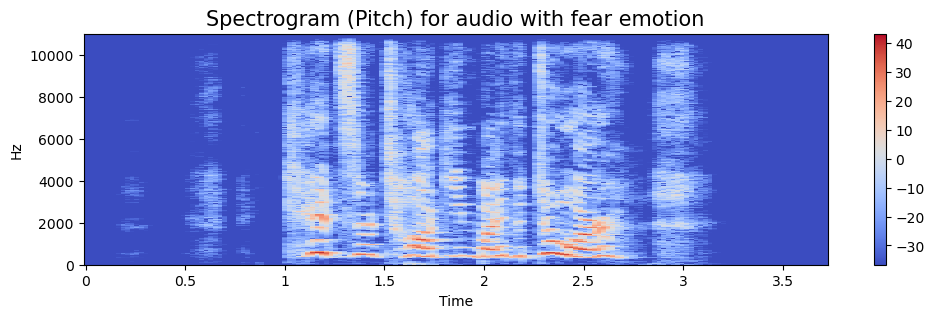

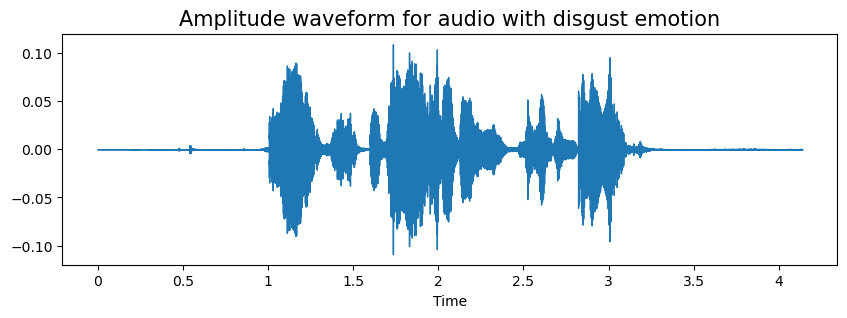

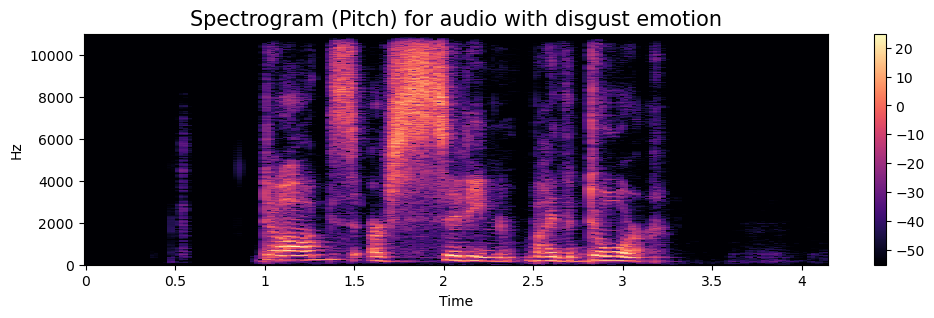

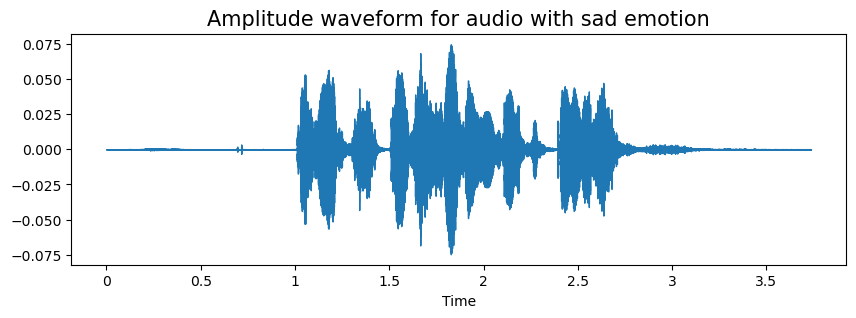

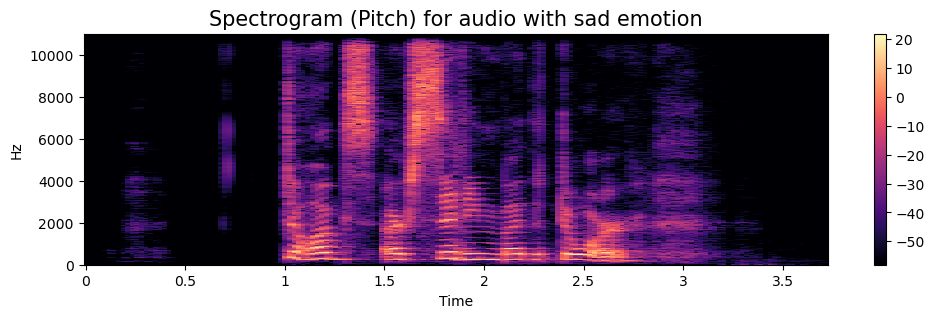

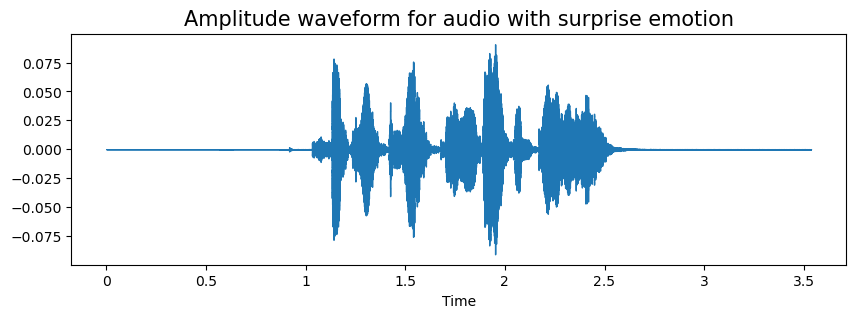

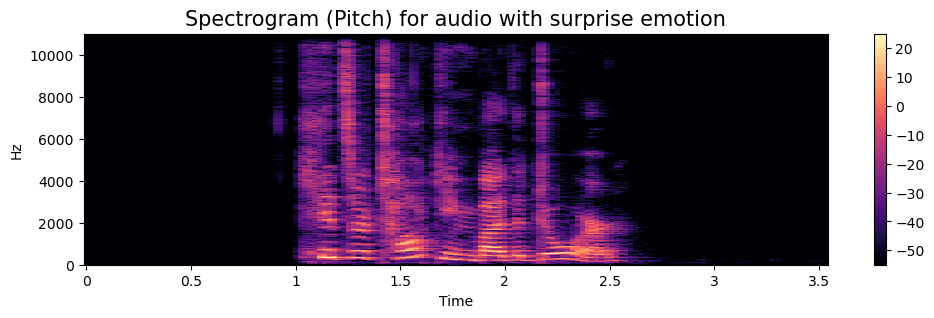

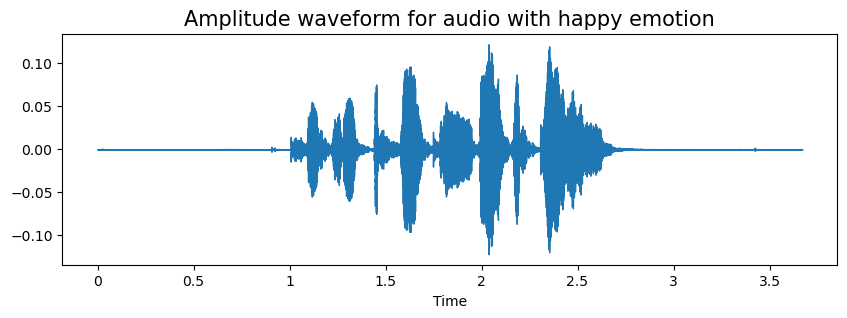

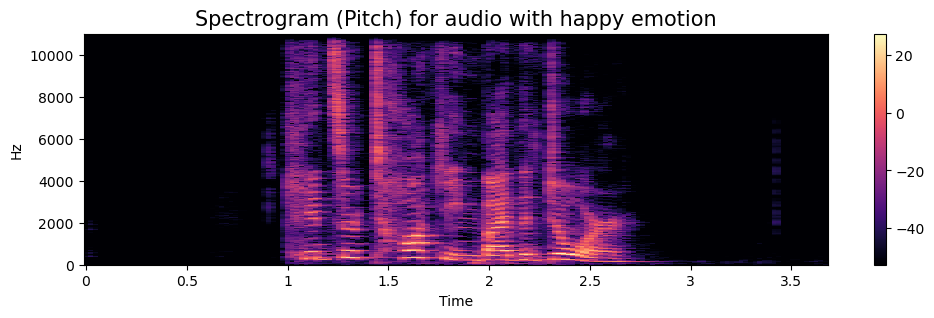

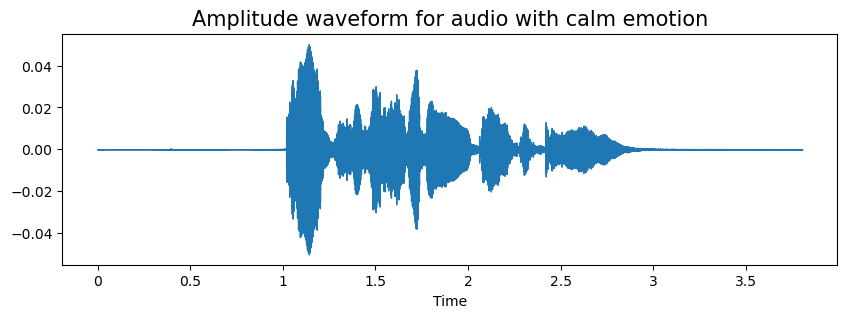

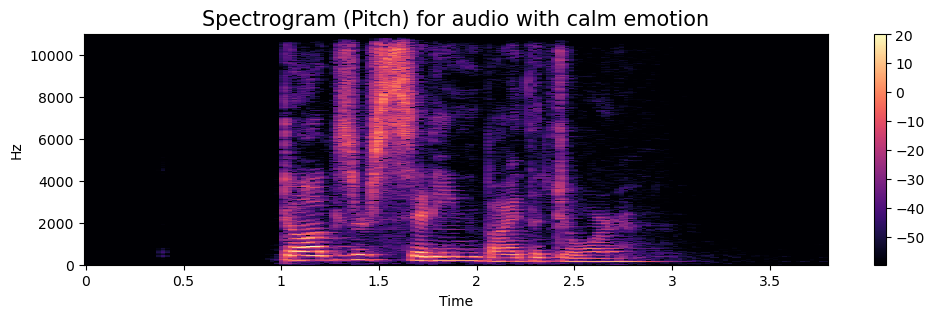

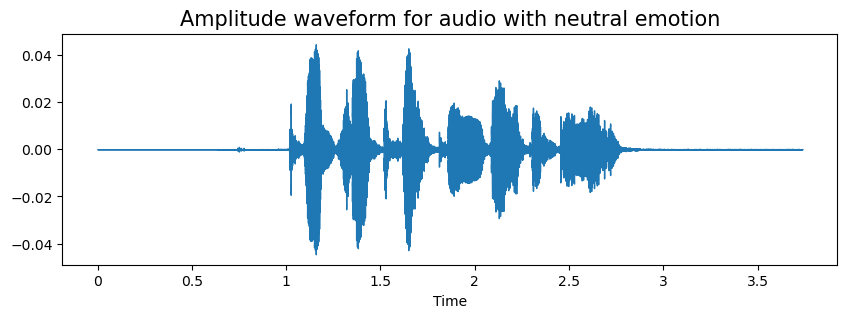

In [23]:
all_emotions = df['Emotions'].unique()
for emotion in all_emotions:
    show(emotion)

### Comparitive MFCC waveform

In [24]:
# generates line plot of mean pitch 

def amp_wave(emotion, gender):
    path = df[(df['Emotions'] == emotion) & (df['Gender'] == gender)]['Path'].iloc[1]
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5) 
    fig = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    fig = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    return fig

In [25]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Emotion", fontsize=18, y=0.95)
nrows = round(len(all_emotions)/2)

for i, emotion in enumerate(all_emotions):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, 2, i + 1)

    plt.plot(amp_wave(emotion, 0),  label='male')
    plt.plot(amp_wave(emotion, 1),  label='female')
    plt.legend()
    ax.set_title(emotion)


## Amplitude Envelope Feature


In [26]:
def amplitude_envelope(emotion, frame_size, hop_len, visualise=True):
    path = np.array(df.Path[df.Emotions==emotion])[1]
    signal, sr = librosa.load(path)
    ae = np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_len)])
    
    frames = range(0, len(ae))
    times = librosa.frames_to_time(frames, hop_length = hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, ae, color='r')
        plt.title(emotion + " Amplitude Envelope")
        plt.show()
    
    return ae


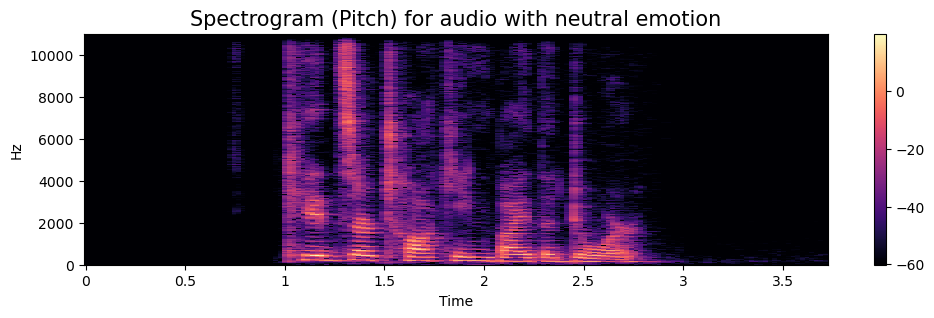

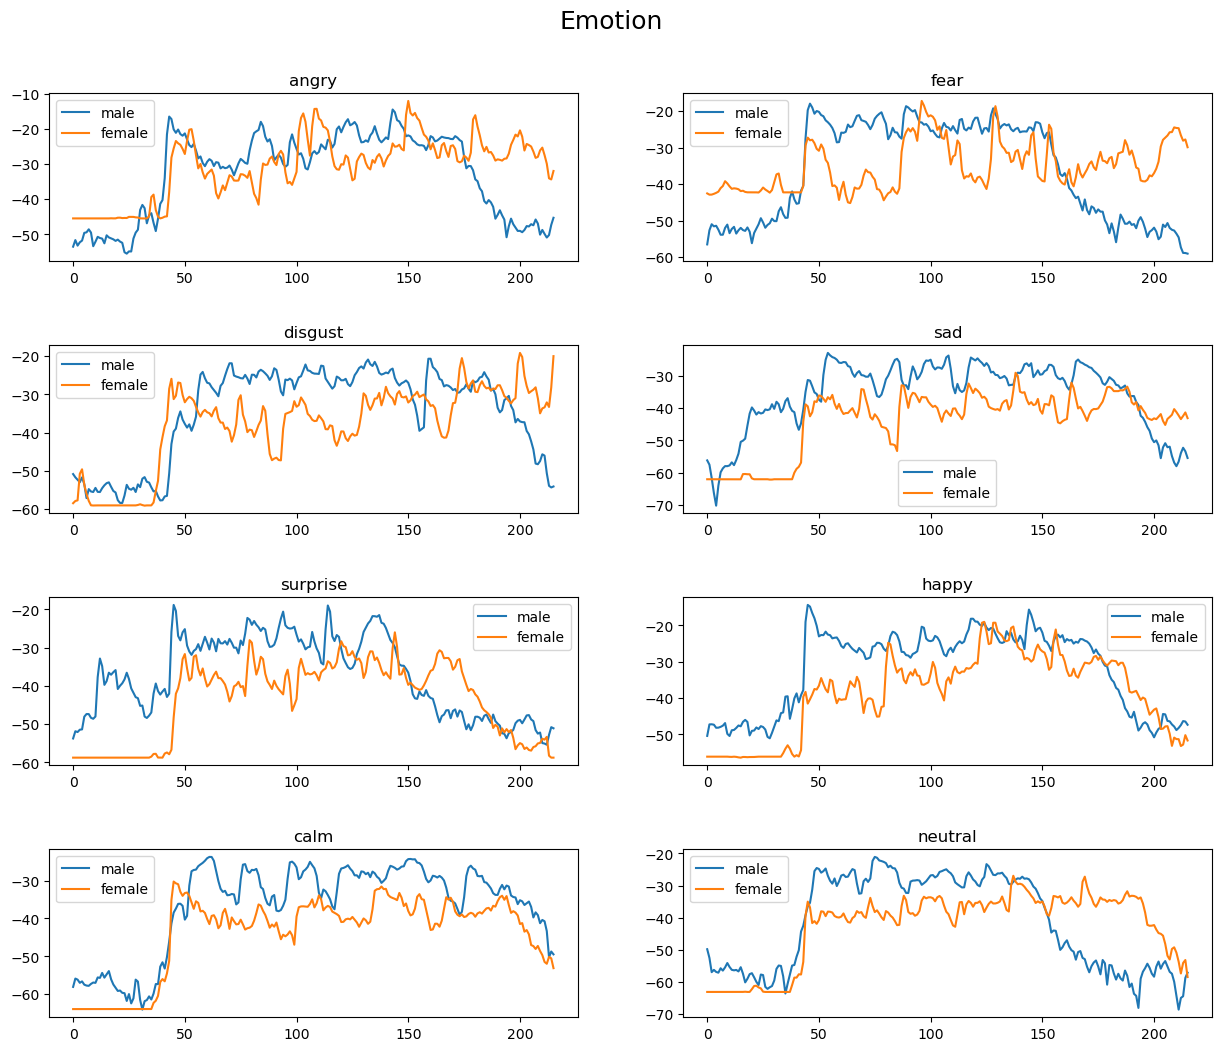

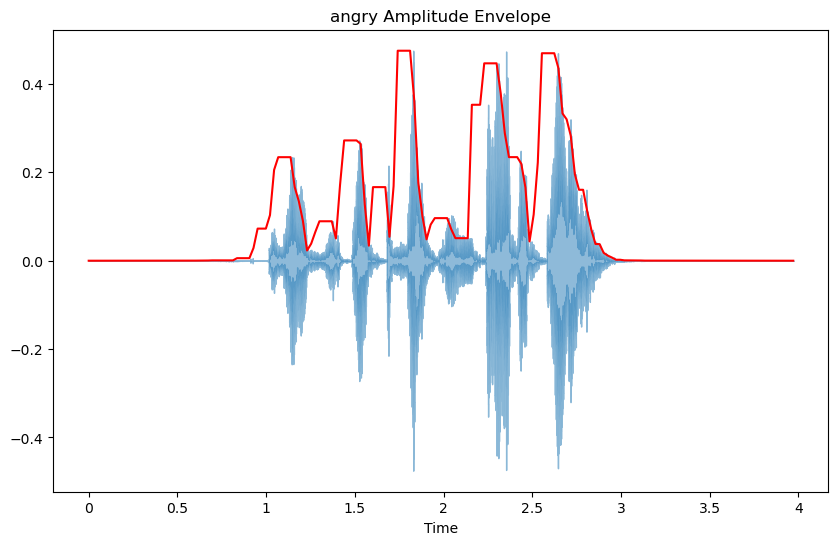

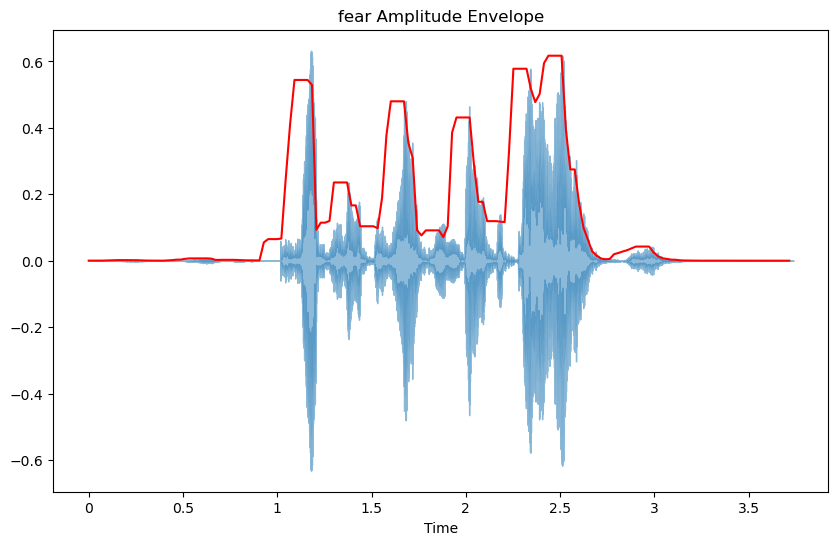

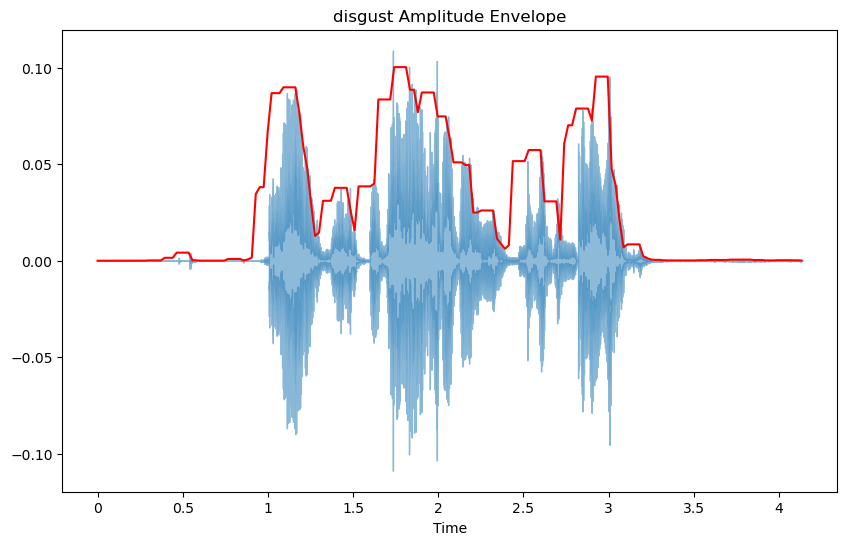

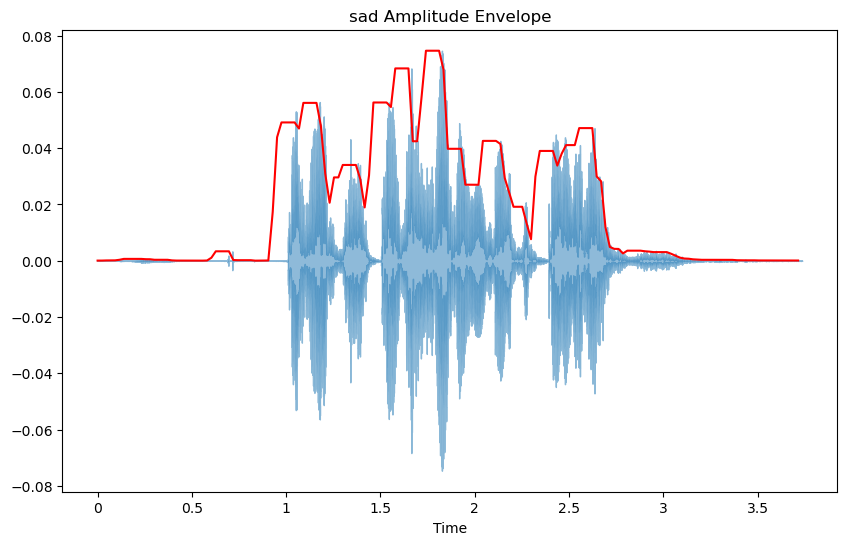

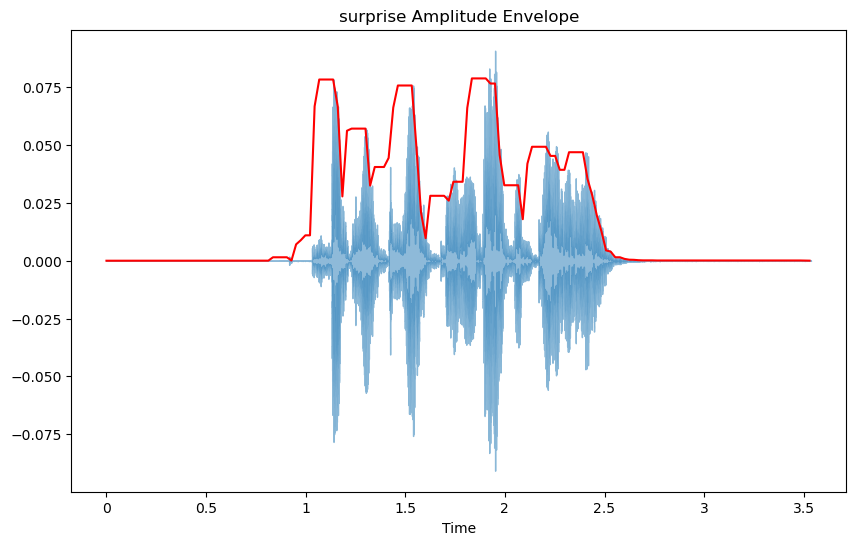

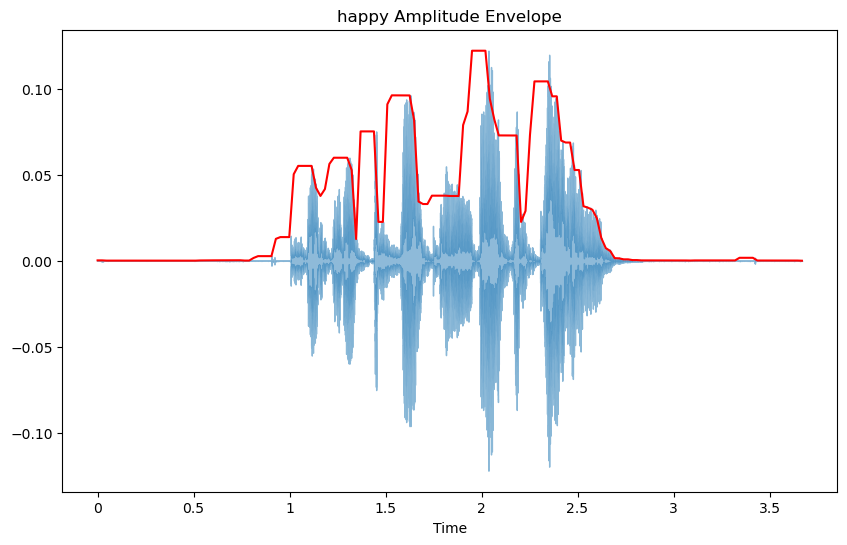

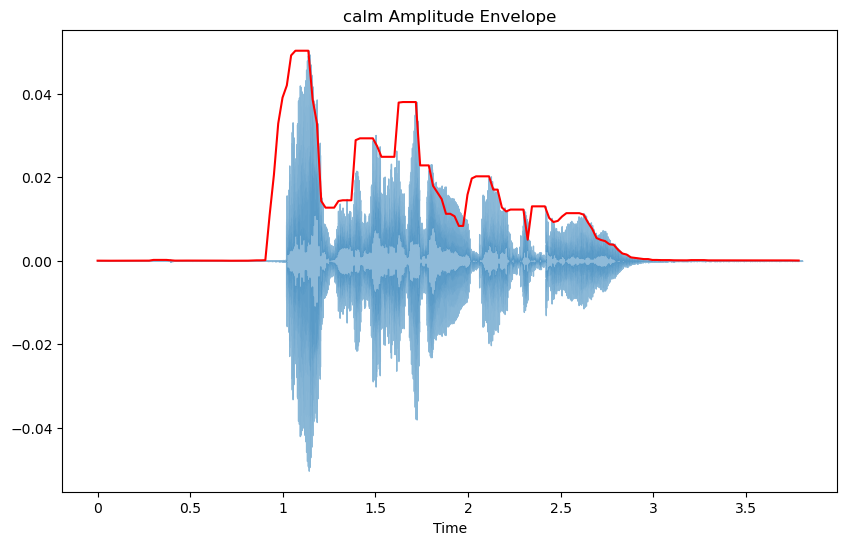

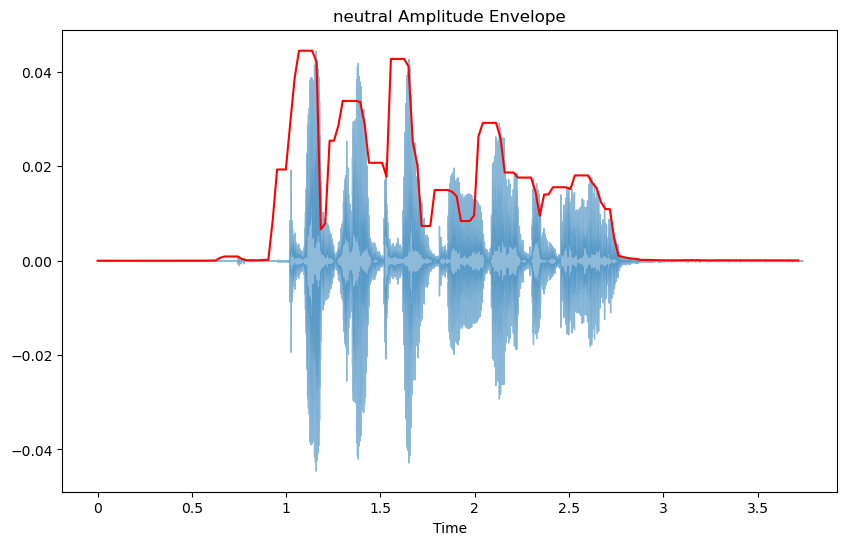

In [27]:
all_emotions = df['Emotions'].unique()
for emotion in all_emotions:
    amplitude_envelope(emotion, frame_size=2048, hop_len=512)

Other metrics for amplitude
- root mean square energy
- zero crossing rate

And other metrics here 

- https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d
- https://jonathan-hui.medium.com/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9